In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable # si nos da un error este comando es por no tenerlo instalado
from datetime import date, datetime
from scipy import stats
pd.options.display.max_columns=None
# establecer el tamaño de nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv('data/bikes_registrados.csv', index_col = 0)
df.head(10)

,registro,clima,temperatura,sens_termica,humedad,viento,registrados,fecha_nueva,festividad,festividad_1,año_bueno,estacion_correcta,mes_bueno,dia_semana_nuevo,no_laboral_nuevo
0,1,2,14.1,18.2,81.0,10.7,654,2018-01-01,New Year's Day,1,2018,invierno,1,0,0
1,2,2,14.9,17.7,70.0,16.7,670,2018-01-02,NaN,0,2018,invierno,1,1,1
2,3,1,8.0,9.5,44.0,16.6,1229,2018-01-03,NaN,0,2018,invierno,1,2,1
3,4,1,8.2,10.6,59.0,10.7,1454,2018-01-04,NaN,0,2018,invierno,1,3,1
4,5,1,9.3,11.5,44.0,12.5,1518,2018-01-05,NaN,0,2018,invierno,1,4,1
5,6,1,8.4,11.7,52.0,6.0,1518,2018-01-06,NaN,0,2018,invierno,1,5,0
6,7,2,8.1,10.4,50.0,11.3,1362,2018-01-07,NaN,0,2018,invierno,1,6,0
7,8,2,6.8,8.1,54.0,17.9,891,2018-01-08,NaN,0,2018,invierno,1,0,1
8,9,1,5.7,5.8,43.0,24.3,768,2018-01-09,NaN,0,2018,invierno,1,1,1
9,10,1,6.2,7.5,48.0,15.0,1280,2018-01-10,NaN,0,2018,invierno,1,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   registro           730 non-null    int64  
 1   clima              730 non-null    int64  
 2   temperatura        730 non-null    float64
 3   sens_termica       730 non-null    float64
 4   humedad            730 non-null    float64
 5   viento             730 non-null    float64
 6   registrados        730 non-null    int64  
 7   fecha_nueva        730 non-null    object 
 8   festividad         21 non-null     object 
 9   festividad_1       730 non-null    int64  
 10  año_bueno          730 non-null    int64  
 11  estacion_correcta  730 non-null    object 
 12  mes_bueno          730 non-null    int64  
 13  dia_semana_nuevo   730 non-null    int64  
 14  no_laboral_nuevo   730 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 91.2+ KB


In [4]:
#Volvemos a cambiar la columna de fecha a datetime, porque al importar el csv no se ha guardado con ese tipo.
df['fecha_nueva'] = pd.to_datetime(df["fecha_nueva"], format="%Y-%m-%d")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   registro           730 non-null    int64         
 1   clima              730 non-null    int64         
 2   temperatura        730 non-null    float64       
 3   sens_termica       730 non-null    float64       
 4   humedad            730 non-null    float64       
 5   viento             730 non-null    float64       
 6   registrados        730 non-null    int64         
 7   fecha_nueva        730 non-null    datetime64[ns]
 8   festividad         21 non-null     object        
 9   festividad_1       730 non-null    int64         
 10  año_bueno          730 non-null    int64         
 11  estacion_correcta  730 non-null    object        
 12  mes_bueno          730 non-null    int64         
 13  dia_semana_nuevo   730 non-null    int64         
 14  no_laboral

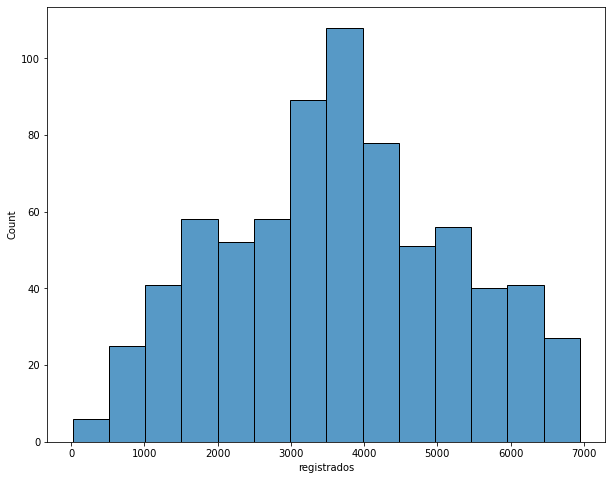

In [6]:
sns.histplot(data = df, x = "registrados");

Parece que tiene una distribución normal de la variable respuesta (dependiente) 'registrados'.

/var/folders/lb/nyps7wf17_767t6ln21znwmh0000gn/T/ipykernel_6962/2740126696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/var/folders/lb/nyps7wf17_767t6ln21znwmh0000gn/T/ipykernel_6962/2740126696.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/var/folders/lb/nyps7wf17_767t6ln21znwmh0000gn/T/ipykernel_6962/2740126696.py:3: FutureWarning: The default value of numeric_only in DataF

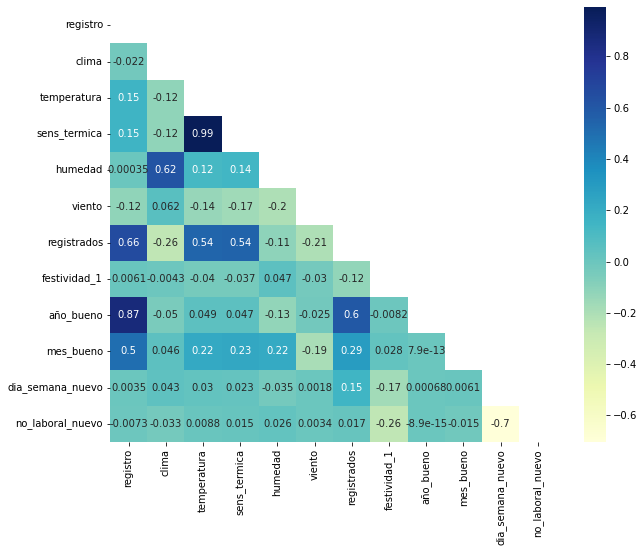

In [7]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # para especoficar el color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación

Vemos que seguimos sin tener mucha relación entre las variables.

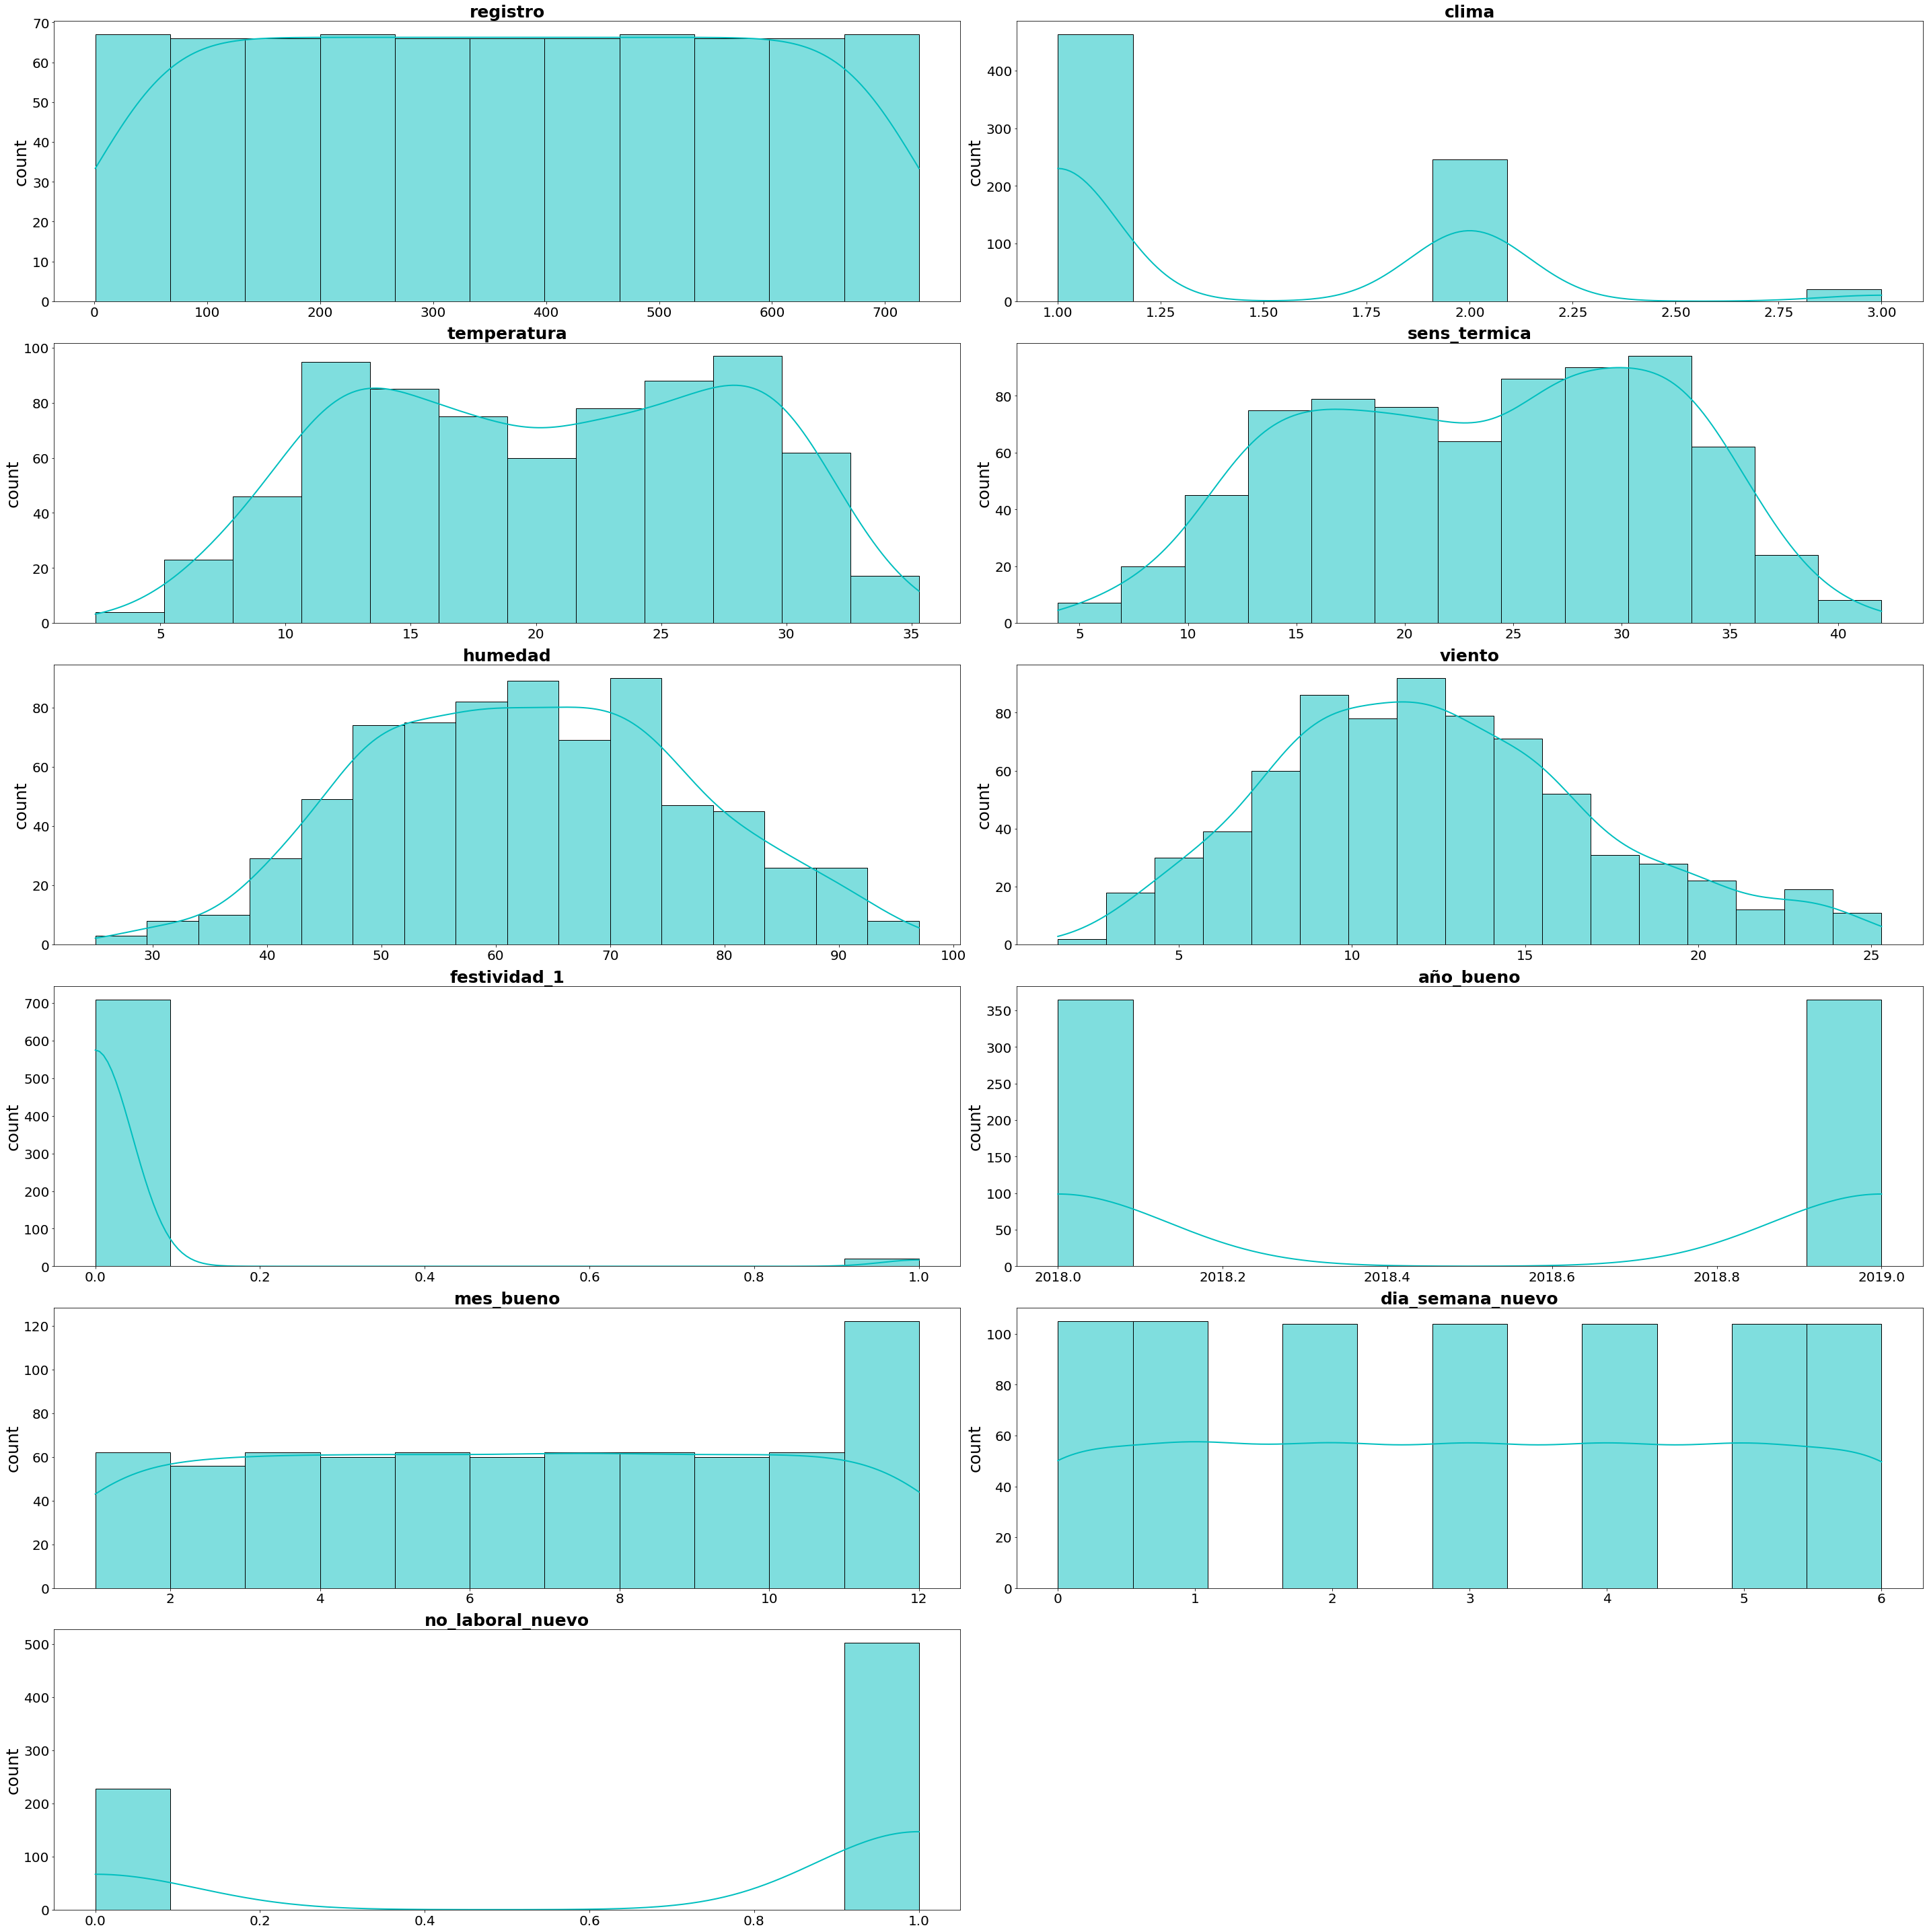

In [8]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (40, 40))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("registrados")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "c", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count", fontsize = 25)


fig.tight_layout()
fig.delaxes(axes[-1]);

De las variables que tenemos registradas con tipo numérico, solo nos interesa analizar como variables numéricas: 'temperatura','sens_termica','viento' y 'humedad'.

''

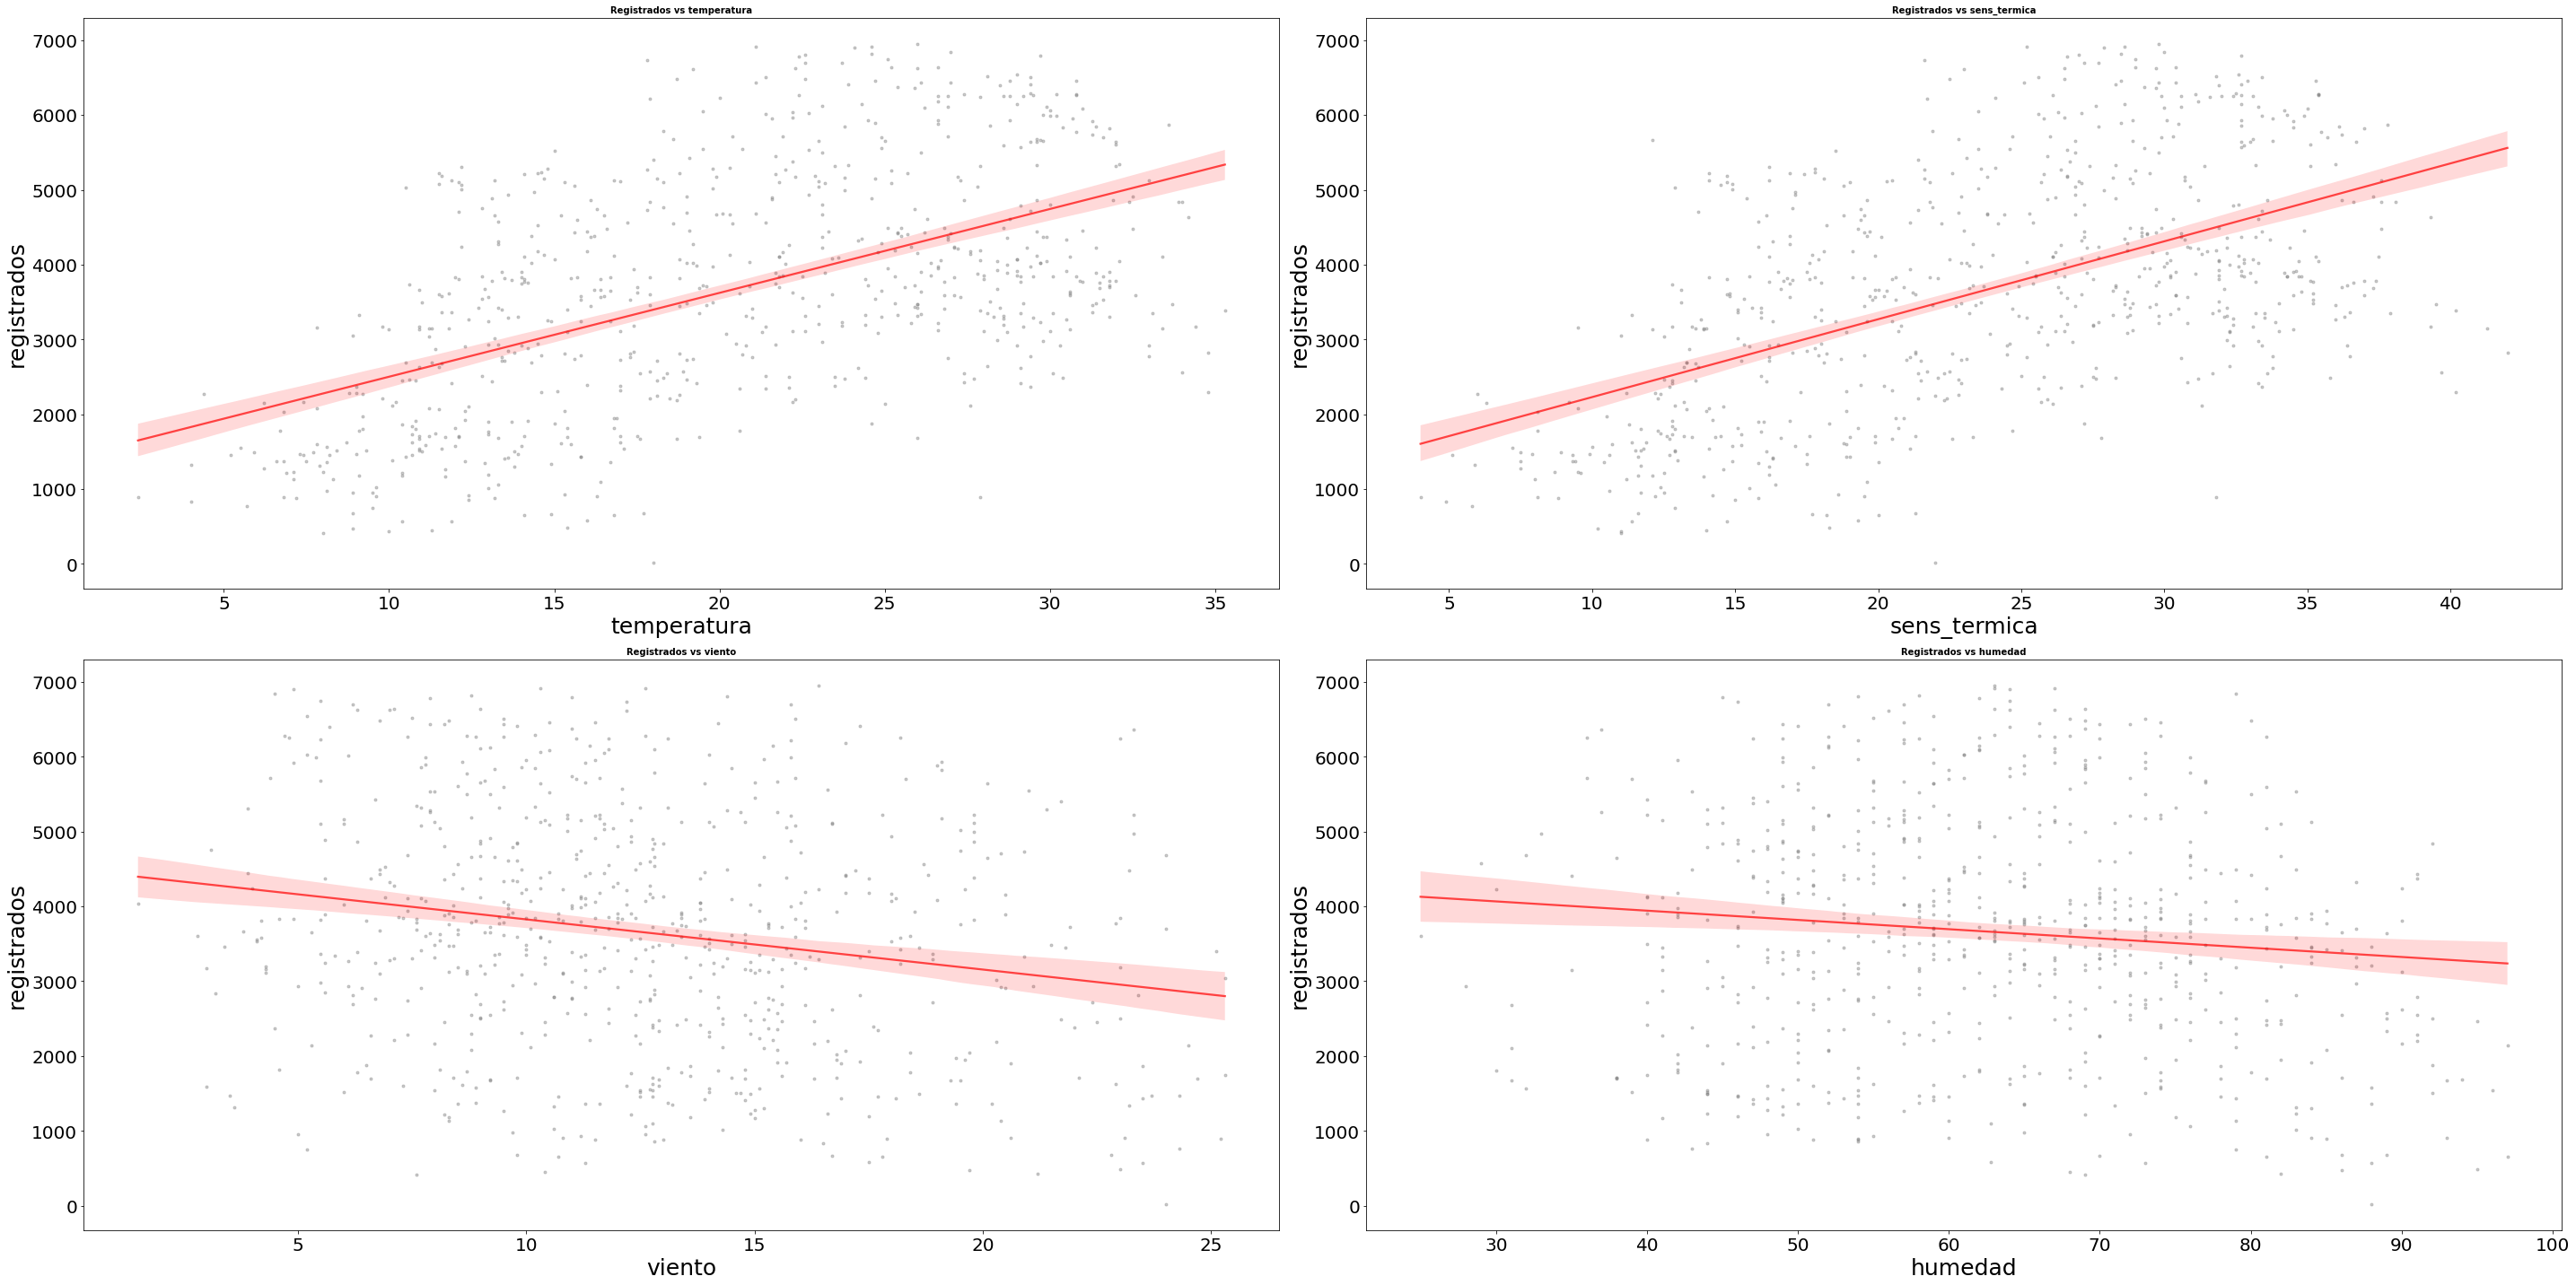

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("registrados")
lista_numericas=['temperatura','sens_termica','viento', 'humedad']

for i, colum in enumerate(lista_numericas):
    sns.regplot(
        x = df[colum], 
        y = df["registrados"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Registrados vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum, fontsize = 25)
    axes[i].set_ylabel( "registrados", fontsize = 25)
    
fig.tight_layout()
#fig.delaxes(axes[-1])
;

Vemos que no hay mucha relación entre las variables viento y humedad con registrados, pero si vemos cierta relación con temperatura y sens_termica.

# Asunciones

In [10]:
# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

## Normalidad

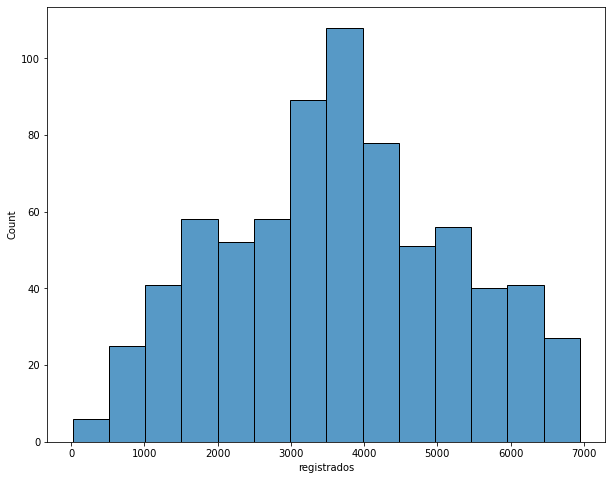

In [11]:
sns.histplot(data = df, x = "registrados");

In [12]:
stats.shapiro(df["registrados"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

Como es p-value menor de 0.05 rechzamos H0, por tanto, nuestros datos no son normales.

## Independencia

In [13]:
predictoras = df.columns.drop("registrados")
predictoras

Index(['registro', 'clima', 'temperatura', 'sens_termica', 'humedad', 'viento',
       'fecha_nueva', 'festividad', 'festividad_1', 'año_bueno',
       'estacion_correcta', 'mes_bueno', 'dia_semana_nuevo',
       'no_laboral_nuevo'],
      dtype='object')

In [14]:
from itertools import combinations
 
# size of combination is set to 3
combinaciones = list(combinations(predictoras, 2))
print(combinaciones) 

[('registro', 'clima'), ('registro', 'temperatura'), ('registro', 'sens_termica'), ('registro', 'humedad'), ('registro', 'viento'), ('registro', 'fecha_nueva'), ('registro', 'festividad'), ('registro', 'festividad_1'), ('registro', 'año_bueno'), ('registro', 'estacion_correcta'), ('registro', 'mes_bueno'), ('registro', 'dia_semana_nuevo'), ('registro', 'no_laboral_nuevo'), ('clima', 'temperatura'), ('clima', 'sens_termica'), ('clima', 'humedad'), ('clima', 'viento'), ('clima', 'fecha_nueva'), ('clima', 'festividad'), ('clima', 'festividad_1'), ('clima', 'año_bueno'), ('clima', 'estacion_correcta'), ('clima', 'mes_bueno'), ('clima', 'dia_semana_nuevo'), ('clima', 'no_laboral_nuevo'), ('temperatura', 'sens_termica'), ('temperatura', 'humedad'), ('temperatura', 'viento'), ('temperatura', 'fecha_nueva'), ('temperatura', 'festividad'), ('temperatura', 'festividad_1'), ('temperatura', 'año_bueno'), ('temperatura', 'estacion_correcta'), ('temperatura', 'mes_bueno'), ('temperatura', 'dia_seman

In [15]:
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df[i[0]], df[i[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(f"INDEPENDENCIA ENTRE {i[0], i[1]} \n", test_results)
    print("........................")

INDEPENDENCIA ENTRE ('registro', 'clima') 
                    Chi-square test    results
0  Pearson Chi-square ( 1458.0) =   1460.0000
1                       p-value =      0.4803
2                    Cramer's V =      1.0000
........................
INDEPENDENCIA ENTRE ('registro', 'temperatura') 
                      Chi-square test      results
0  Pearson Chi-square ( 185166.0) =   185420.0000
1                         p-value =        0.3379
2                      Cramer's V =        1.0000
........................
INDEPENDENCIA ENTRE ('registro', 'sens_termica') 
                      Chi-square test      results
0  Pearson Chi-square ( 205578.0) =   205860.0000
1                         p-value =        0.3297
2                      Cramer's V =        1.0000
........................
INDEPENDENCIA ENTRE ('registro', 'humedad') 
                     Chi-square test     results
0  Pearson Chi-square ( 51030.0) =   51100.0000
1                        p-value =       0.4125
2     

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/researchpy/crosstab.py:94: RuntimeWarning: invalid value encountered in true_divide
  V = numpy.sqrt(test_val / (n * min((num_row - 1), (num_col - 1))))


INDEPENDENCIA ENTRE ('festividad', 'estacion_correcta') 
                  Chi-square test  results
0  Pearson Chi-square ( 30.0) =   63.0000
1                     p-value =    0.0004
2                  Cramer's V =    1.0000
........................
INDEPENDENCIA ENTRE ('festividad', 'mes_bueno') 
                  Chi-square test  results
0  Pearson Chi-square ( 70.0) =     147.0
1                     p-value =       0.0
2                  Cramer's V =       1.0
........................
INDEPENDENCIA ENTRE ('festividad', 'dia_semana_nuevo') 
                  Chi-square test  results
0  Pearson Chi-square ( 40.0) =   47.3846
1                     p-value =    0.1968
2                  Cramer's V =    0.7511
........................


/Users/ana/opt/anaconda3/lib/python3.9/site-packages/researchpy/crosstab.py:94: RuntimeWarning: invalid value encountered in true_divide
  V = numpy.sqrt(test_val / (n * min((num_row - 1), (num_col - 1))))


INDEPENDENCIA ENTRE ('festividad', 'no_laboral_nuevo') 
                 Chi-square test  results
0  Pearson Chi-square ( 0.0) =       0.0
1                    p-value =       1.0
2                 Cramer's V =       NaN
........................
INDEPENDENCIA ENTRE ('festividad_1', 'año_bueno') 
                 Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.0490
1                    p-value =    0.8248
2               Cramer's phi =    0.0082
........................
INDEPENDENCIA ENTRE ('festividad_1', 'estacion_correcta') 
                 Chi-square test  results
0  Pearson Chi-square ( 3.0) =    4.7808
1                    p-value =    0.1886
2                 Cramer's V =    0.0809
........................
INDEPENDENCIA ENTRE ('festividad_1', 'mes_bueno') 
                  Chi-square test  results
0  Pearson Chi-square ( 11.0) =   16.7068
1                     p-value =    0.1169
2                  Cramer's V =    0.1513
........................
INDEPENDENCIA ENTRE

Recogemos aquí las variables dependientes:

|   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|
|Festividad   |estacion   |mes bueno   |   |   |   |   |   |   |
|festividad_1   |dia_semana   |   |   |   |   |   |   |   |
|año_bueno   |NINGUNA   |   |   |   |   |   |   |   |
|estación_correcta   |mes_bueno   |   |   |   |   |   |   |   |
|dia_semana   |no_laboral   |   |   |   |   |   |   |   |
|clima   |temperatura   |humedad   |viento   |estacion_correcta   |mes_bueno   |   |   |   |
|temperatura   |sens_termica   |humedad   |viento   |festividad   |estacion   |mes   |   |   |
|humedad   |viento   |estacion_correcta   |   |   |   |   |   |   |
|viento   |estacion_correcta   |mes_bueno   |   |   |   |   |   |   |
|sens_termica   |mes_bueno   |estacion_correcta   |   |   |   |   |   |   |

Vemos cuales eliminamos:

-  


## Homogeneidad 

In [22]:
df.head()

,registro,clima,temperatura,sens_termica,humedad,viento,registrados,fecha_nueva,festividad,festividad_1,año_bueno,estacion_correcta,mes_bueno,dia_semana_nuevo,no_laboral_nuevo
0,1,2,14.1,18.2,81.0,10.7,654,2018-01-01,New Year's Day,1,2018,invierno,1,0,0
1,2,2,14.9,17.7,70.0,16.7,670,2018-01-02,NaN,0,2018,invierno,1,1,1
2,3,1,8.0,9.5,44.0,16.6,1229,2018-01-03,NaN,0,2018,invierno,1,2,1
3,4,1,8.2,10.6,59.0,10.7,1454,2018-01-04,NaN,0,2018,invierno,1,3,1
4,5,1,9.3,11.5,44.0,12.5,1518,2018-01-05,NaN,0,2018,invierno,1,4,1


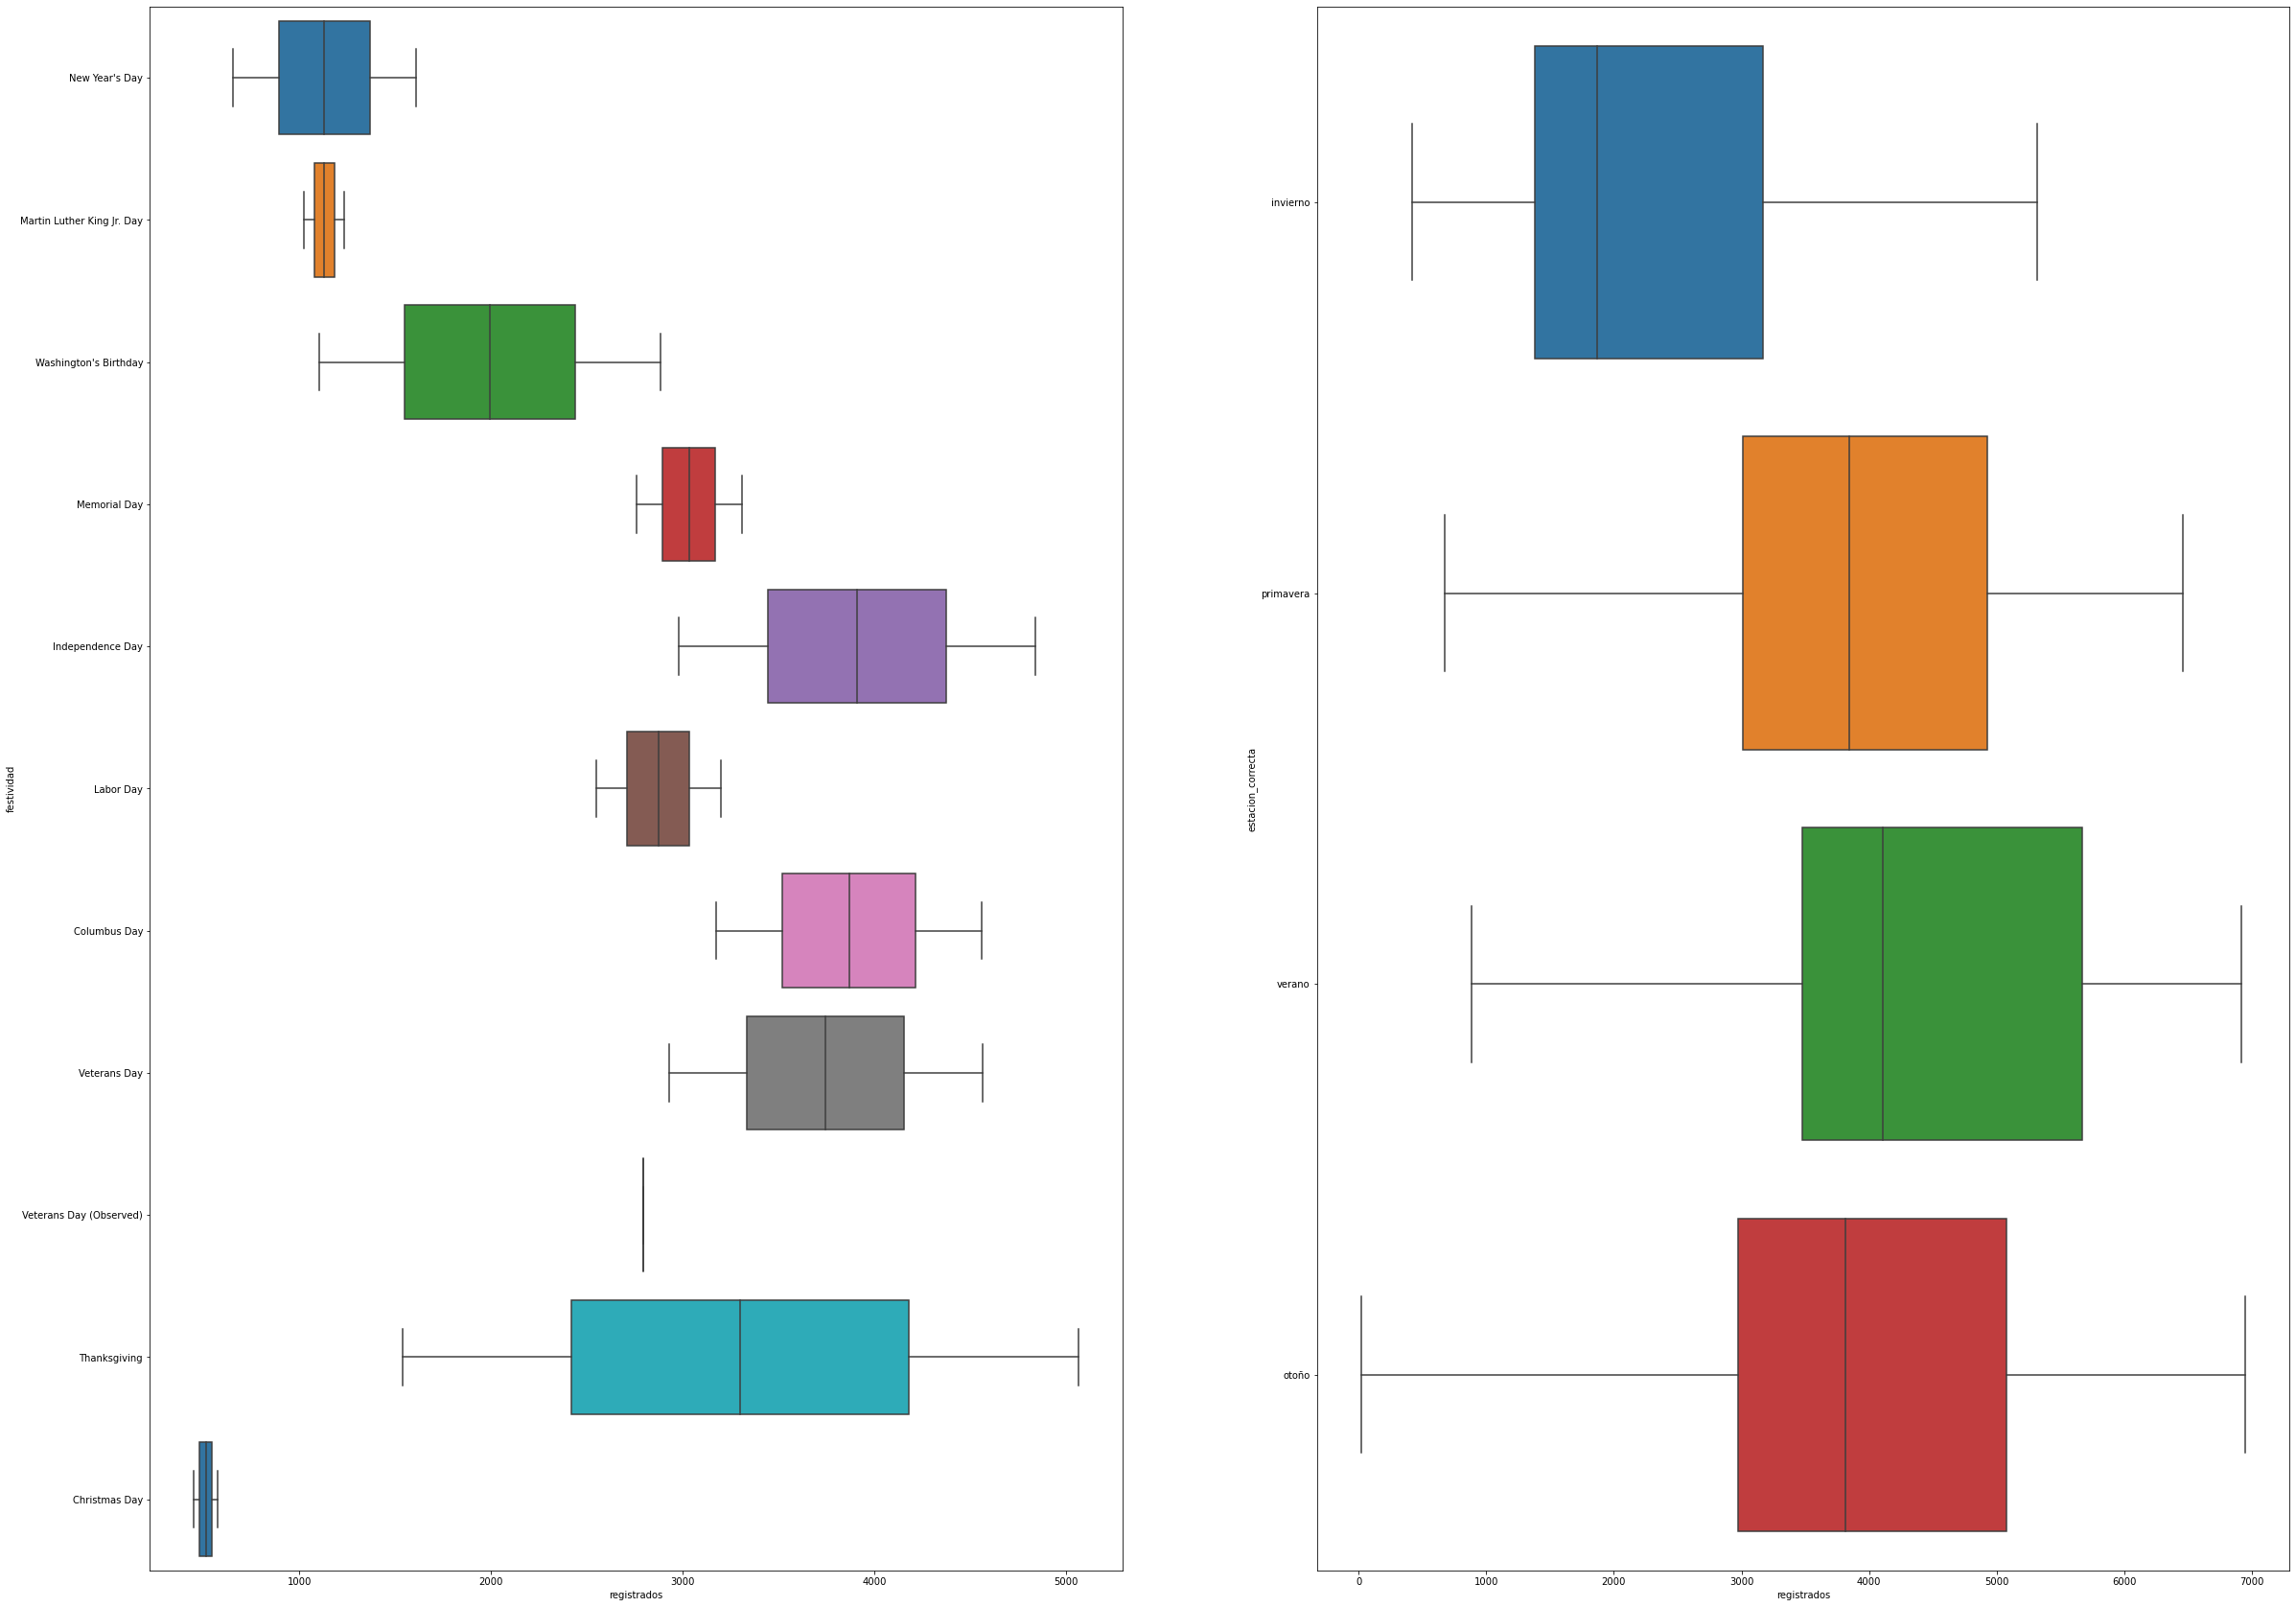

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (40, 30))

axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = 'registrados',
    y       = colum,
    data    = df,
    palette = 'tab10',
    ax      = axes[i]
    )

In [17]:
def datos_test_levene(columna, df):
    valores = df[columna].unique()
    d = {}
    for x in valores:
        d["{0}".format(x)] = df[df[columna] == x]["registrados"]
    return d

In [18]:
festivo = datos_test_levene("festividad", df)
estacion = datos_test_levene("estacion_correcta", df)

In [19]:
levene_festivo = stats.levene(festivo["New Year's Day"], festivo['Martin Luther King Jr. Day'], festivo["Washington's Birthday"], festivo['Memorial Day'], festivo['Independence Day'], festivo['Columbus Day'], festivo['Veterans Day'], festivo['Veterans Day (Observed)'], festivo['Thanksgiving'], festivo['Christmas Day'],center='median')
levene_festivo

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: divide by zero encountered in double_scalars
  W = numer / denom


LeveneResult(statistic=inf, pvalue=0.0)

In [21]:
levene_estacion = stats.levene(estacion["primavera"], estacion['verano'], estacion["otoño"], estacion['invierno']) 
levene_estacion


LeveneResult(statistic=1.5287877272750754, pvalue=0.20569008595675392)

Teniendo en cuenta los valores de p_value:

-Al ser menor de 0.05 la columna festivo nos da un valor heterocedastico, por lo que no cumple asunciones

No se cumple ninguna asuncion, por lo que no podemos hacer ANOVA

## Vamos a intentar normalizar la variable respuesta para ver si podemos seguir

Usaremos BOX_COX

In [33]:
df['registrados_BOX'], lambda_ajustada = stats.boxcox(df['registrados'])


In [34]:
lambda_ajustada

0.8350144346564095

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


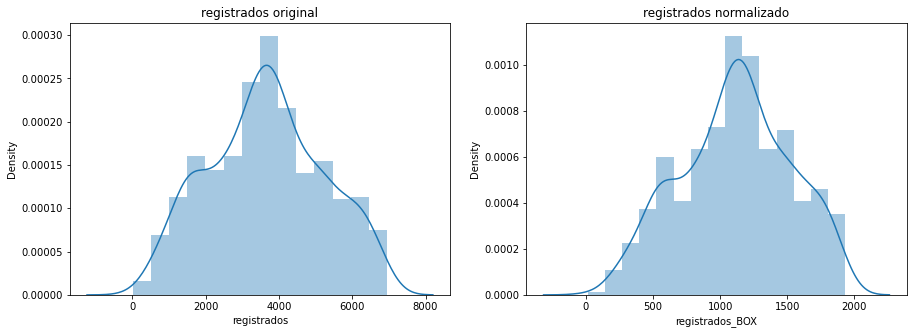

In [35]:
#comprobamos graficamente si los datos se han normalizado
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('registrados original')
axes[1].set_title('registrados normalizado')

sns.distplot(df['registrados'] ,ax = axes[0])
sns.distplot(df['registrados_BOX'], ax = axes[1]);

In [36]:
#realizamos test de shapiro para comprobarlo analiticamente
stats.shapiro(df["registrados_BOX"])

ShapiroResult(statistic=0.9854231476783752, pvalue=1.1639369859040016e-06)

Podemos seguir afirmando que nuestra variable respuesta NO es normal

Proximos pasos:
- comprobar asunciones
- normalizar
- estandarizar